# Soil Type Classification using CNN
This notebook trains a Convolutional Neural Network (CNN) to classify soil types using soil images.


In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
BASE_DIR="../data/soil_images"
TRAIN_DIR=os.path.join(BASE_DIR,"train_data")
TEST_DIR=os.path.join(BASE_DIR,"test")

In [3]:
IMG_SIZE=(128,128)
BATCH_SIZE=16
EPOCHS=15

In [4]:
#Simple meaning Convert pixel values from 0–255 → 0–1
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
train_generator=train_datagen.flow_from_directory(TRAIN_DIR,
                                                  target_size=IMG_SIZE,
                                                  batch_size=BATCH_SIZE,
                                                  class_mode="categorical")
test_generator=test_datagen.flow_from_directory(TEST_DIR,
                                                target_size=IMG_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode="categorical")

Found 343 images belonging to 4 classes.
Found 158 images belonging to 4 classes.


In [7]:
train_generator.class_indices

{'Alluvial Soil': 0, 'Black Soil': 1, 'Clay Soil': 2, 'Red Soil': 3}

In [8]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(4, activation="softmax"))


In [9]:
model.compile(optimizer="adam", 
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
history=model.fit(train_generator, 
                  epochs=EPOCHS, 
                  validation_data=test_generator)

Epoch 1/15


22/22 [==============================] - 22s 839ms/step - loss: 1.1937 - accuracy: 0.5569 - val_loss: 0.7028 - val_accuracy: 0.7785
Epoch 2/15
22/22 [==============================] - 7s 308ms/step - loss: 0.6696 - accuracy: 0.7522 - val_loss: 0.4022 - val_accuracy: 0.8481
Epoch 3/15
22/22 [==============================] - 7s 288ms/step - loss: 0.5549 - accuracy: 0.7872 - val_loss: 0.4478 - val_accuracy: 0.8418
Epoch 4/15
22/22 [==============================] - 6s 280ms/step - loss: 0.5013 - accuracy: 0.7930 - val_loss: 0.3804 - val_accuracy: 0.8228
Epoch 5/15
22/22 [==============================] - 7s 327ms/step - loss: 0.6200 - accuracy: 0.7405 - val_loss: 0.4804 - val_accuracy: 0.7658
Epoch 6/15
22/22 [==============================] - 8s 345ms/step - loss: 0.4874 - accuracy: 0.8105 - val_loss: 0.7799 - val_accuracy: 0.6962
Epoch 7/15
22/22 [==============================] - 8s 363ms/step - loss: 0.5080 - accuracy: 0.7930 - val_loss: 0.5476 - val_accuracy: 0.7975
Epo

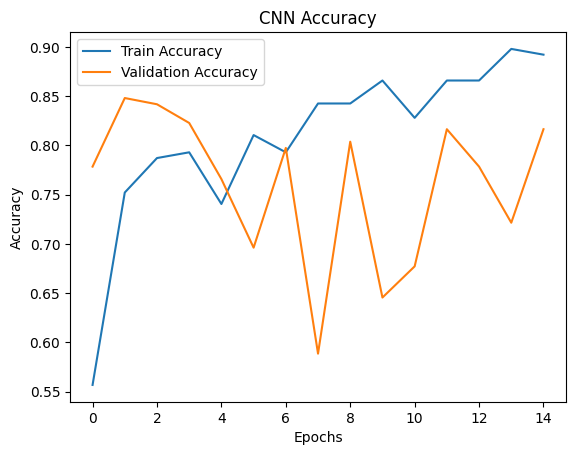

training accuracy:0.56 to 0.8979591727256775


In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
print("training accuracy:"+str(round(min(history.history['accuracy']),2))+' to '+str(max(history.history['accuracy'])))

In [22]:
model.save("../models/cnn_soil_model.h5")
print("CNN model saved successfully")


D:\anaconda\envs\soilcnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


CNN model saved successfully
